# Inspect Query Plans

In [1]:
import polars as pl

In [2]:
pl.__version__

'1.5.0'

## .explain() method

In [20]:
print(
    pl.scan_csv('pokemon.csv')
    .filter(pl.col('Type 1')=='Grass')
    .with_columns(pl.col('HP').max().alias('Max HP'))
    .filter(pl.col('HP')>300)
    .select('Name', 'Type 1', 'HP', 'Max HP')
    .explain()
)

FILTER [(col("HP")) > (300)] FROM
   WITH_COLUMNS:
   [col("HP").max().alias("Max HP")] 
    Csv SCAN [pokemon.csv]
    PROJECT 3/13 COLUMNS
    SELECTION: [(col("Type 1")) == (String(Grass))]


In [21]:
print(
    pl.scan_csv('pokemon.csv')
    .filter(pl.col('Type 1')=='Grass')
    .with_columns(pl.col('HP').max().alias('Max HP'))
    .filter(pl.col('HP')>300)
    .select('Name', 'Type 1', 'HP', 'Max HP')
    .explain(optimized=False)
)

 SELECT [col("Name"), col("Type 1"), col("HP"), col("Max HP")] FROM
  FILTER [(col("HP")) > (300)] FROM
     WITH_COLUMNS:
     [col("HP").max().alias("Max HP")] 
      FILTER [(col("Type 1")) == (String(Grass))] FROM
        Csv SCAN [pokemon.csv]
        PROJECT */13 COLUMNS


## .show_graph() method

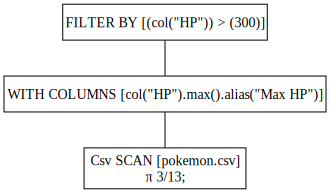

In [14]:
(
    pl.scan_csv('pokemon.csv')
    .filter(pl.col('Type 1')=='Grass')
    .with_columns(pl.col('HP').max().alias('Max HP'))
    .filter(pl.col('HP')>300)
    .select('Name', 'Type 1', 'HP', 'Max HP')
    .show_graph()
)

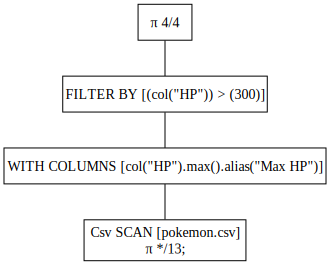

In [12]:
(
    pl.scan_csv('pokemon.csv')
    .filter(pl.col('Type 1')=='Grass')
    .with_columns(pl.col('HP').max().alias('Max HP'))
    .filter(pl.col('HP')>300)
    .select('Name', 'Type 1', 'HP', 'Max HP')
    .show_graph(optimized=False)
)

## Optimizing Query Plans

In [23]:
print(
    pl.scan_csv('pokemon.csv')
    .filter(pl.col('Type 1')=='Grass')
    .filter(pl.col('HP')>300)
    .with_columns(pl.col('HP').max().alias('Max HP'))
    .select('Name', 'Type 1', 'HP', 'Max HP')
    .explain()
)

 WITH_COLUMNS:
 [col("HP").max().alias("Max HP")] 
  Csv SCAN [pokemon.csv]
  PROJECT 3/13 COLUMNS
  SELECTION: [([(col("HP")) > (300)]) & ([(col("Type 1")) == (String(Grass))])]


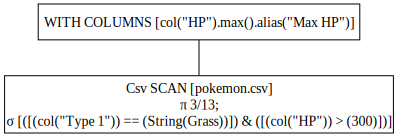

In [22]:
(
    pl.scan_csv('pokemon.csv')
    .filter(pl.col('Type 1')=='Grass')
    .filter(pl.col('HP')>300)
    .with_columns(pl.col('HP').max().alias('Max HP'))
    .select('Name', 'Type 1', 'HP', 'Max HP')
    .show_graph()
)